---
# Spark for data analysis
<h2> Meron and MD</h2>
***
<h2> Big Data Course project, Source code</h2>
***

In [ ]:
import yfinance as yf

# PySpark and Initializing Spark Session

In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark=SparkSession.builder.appName("Gold").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/06 10:59:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
spark

In [35]:
from pyspark.sql.functions import col, stddev, mean
from pyspark.sql.window import Window

# Fetching dataset

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

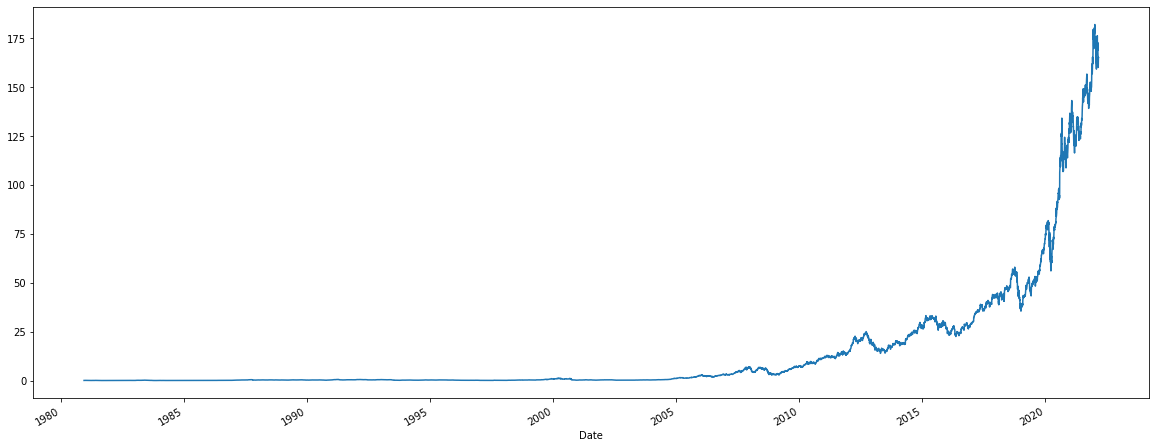

In [33]:
# Fetch data from yfinance
data = yf.download("AAPL", start="1980-01-01", end="2022-03-01", interval="1d")
data['Close'].plot(figsize = (20,8)) 

# Converting dataset to PySpark dataframe

In [9]:
# Convert the pandas DataFrame to a PySpark DataFrame
df = spark.createDataFrame(data.reset_index()).select(['Date','Open','Close'])
df.count()

10391

In [10]:
# Calculate the rolling mean and standard deviation of the closing price
window = Window.orderBy(col("Date")).rowsBetween(-200, 0)
df = df.withColumn("rolling_mean", mean(col("Close")).over(window)) \
       .withColumn("rolling_stddev", stddev(col("Close")).over(window)).na.drop()

In [11]:
# Show the PySpark DataFrame
df.show(4)

23/03/06 11:21:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/06 11:21:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/06 11:21:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/06 11:21:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/03/06 11:21:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
+-------------------+-------------------+-------------------+-------------------+--------------------+
|               Date|               Open|              Close|       roll

# Converting to pandas for visualization

In [12]:
import matplotlib.pyplot as plt

In [29]:
pdf = df.toPandas()

In [30]:
pdf.head()

,Date,Open,Close,rolling_mean,rolling_stddev
0,1980-12-15,0.122210,0.121652,0.125000,0.004735
1,1980-12-16,0.113281,0.112723,0.120908,0.007839
2,1980-12-17,0.115513,0.115513,0.119559,0.006946
3,1980-12-18,0.118862,0.118862,0.119420,0.006023
4,1980-12-19,0.126116,0.126116,0.120536,0.006041


# Graphs of rolling mean and standard deviation 

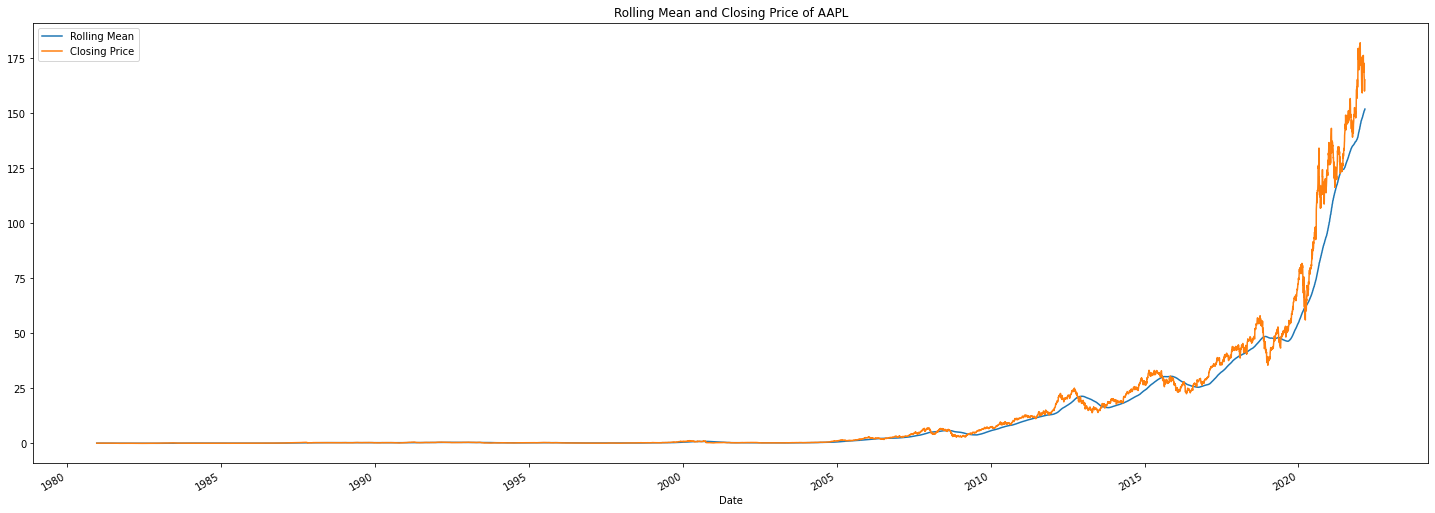

In [31]:
# Set the date column as the index for the Pandas DataFrame
pdf.set_index('Date', inplace=True)

# Plot the rolling mean and closing price against the index
pdf[['rolling_mean', 'Close']].plot(figsize=(25,9))

# Set the title and legend for the plot
plt.title("Rolling Mean and Closing Price of AAPL")
plt.legend(['Rolling Mean', 'Closing Price'])

# Show the plot
plt.show()

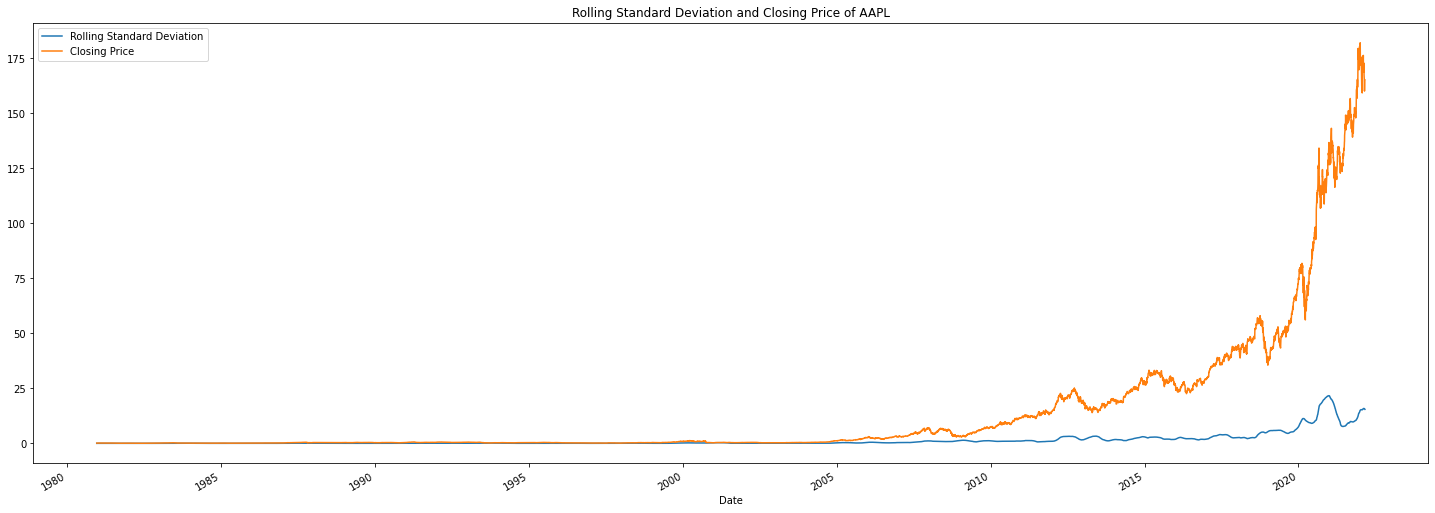

In [32]:
# Plot the rolling standard deviation and closing price against the index
pdf[['rolling_stddev', 'Close']].plot(figsize=(25,9))

# Set the title and legend for the plot
plt.title("Rolling Standard Deviation and Closing Price of AAPL")
plt.legend(['Rolling Standard Deviation', 'Closing Price'])

# Show the plot
plt.show()
